In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 30
%matplotlib inline  

In [2]:
import cv2

In [3]:
from infer_demo import Homographier,KeyPointModel

In [4]:
ckpt=r'/home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/models/kp2d/v4.ckpt'

In [5]:
image_list=[
    r'/home/chiebotgpuhq/Share/gpu-server/disk/disk3/homography_dataset/chiebot_test/generate_data/b599fb3bcaae11a620a7b011a6c1459b/1.jpg',
    r'/home/chiebotgpuhq/Share/gpu-server/disk/disk3/homography_dataset/chiebot_test/generate_data/b599fb3bcaae11a620a7b011a6c1459b/6.jpg'
]

In [6]:
def plt_show(img_path):
    img=mpimg.imread(img_path)
    plt.imshow(img)

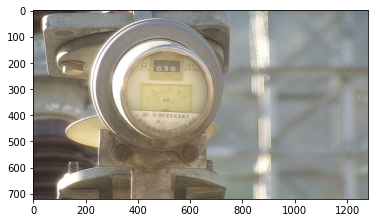

In [7]:
plt_show(image_list[0])

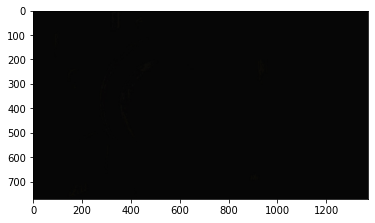

In [8]:
plt_show(image_list[1])

In [9]:
matcher=Homographier()

In [10]:
def get_kp(im1_path,im2_path,features_type='orb'):
    im1=cv2.imread(im1_path,cv2.IMREAD_COLOR)
    im2=cv2.imread(im2_path,cv2.IMREAD_COLOR)

    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    if 'orb'==features_type:
    # Detect ORB features and compute descriptors.
        detector = cv2.ORB_create(1000)
    elif 'sift'==features_type:
        detector = cv2.SIFT_create(1000)
    else:
        raise ValueError()
    keypoints1, descriptors1 = detector.detectAndCompute(im1Gray, None)
    kp1_array= np.array([list(kp.pt) for kp in keypoints1])
    keypoints2, descriptors2 = detector.detectAndCompute(im2Gray, None)
    kp2_array= np.array([list(kp.pt) for kp in keypoints2])
    return kp1_array, descriptors1,kp2_array,descriptors2

## 使用ORB特征

In [11]:
kp1_o,d1_o,kp2_o,d2_o=get_kp(*image_list,features_type='orb')

In [12]:
H=matcher(kp1_o,d1_o,kp2_o,d2_o)

error: OpenCV(4.4.0) /tmp/pip-req-build-qacpj5ci/opencv/modules/core/src/batch_distance.cpp:274: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'


In [13]:
print(H)

NameError: name 'H' is not defined

## 使用SIFT

In [14]:
kp1_o,d1_o,kp2_o,d2_o=get_kp(*image_list,features_type='sift')

In [15]:
H=matcher(kp1_o,d1_o,kp2_o,d2_o)

error: OpenCV(4.4.0) /tmp/pip-req-build-qacpj5ci/opencv/modules/features2d/src/matchers.cpp:761: error: (-215:Assertion failed) _queryDescriptors.type() == trainDescType in function 'knnMatchImpl'


In [16]:
print(H)

NameError: name 'H' is not defined

##  使用kpnet

In [17]:
model=KeyPointModel(ckpt)

Loaded KeypointNet from /home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/models/kp2d/v4.ckpt
KeypointNet params descriptor_loss: True
do_cross: True
do_upsample: True
use_color: True
with_io: True


In [18]:
kp_result=model(*image_list)
H=matcher(*kp_result)

In [19]:
print(H)

(0, 0, 0)
